In [2]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.DataFrame.from_csv("output/26_combine_data/2017-06-13 12:08:55 c07ff01/combined.csv")

In [5]:
df.head()

,to_ga,to_fa,from_ga,from_fa,performance,Delta_a,Delta_b,Delta_c,N_a,N_b,...,mean_editors,revision_count,degree_mean,in_degree_skew,out_degree_skew,flow_mean,connectivity,path_harmonic,path_mean,ga_mean
1,0,0,NaN,NaN,NaN,0,7,16,4701,4086,...,23.678733,48340.0,84.969431,6.552500,5.440982,30.633611,0.969314,2.158216,2.196464,0.002801
2,7,4,NaN,NaN,0.636364,12,28,51,16155,12766,...,22.685771,46898.0,160.865758,4.907619,4.957842,67.833889,0.981369,2.055569,2.102919,0.171089
4,15,0,NaN,NaN,1.000000,0,5,12,6091,6091,...,21.706960,30812.0,183.424278,2.447996,2.197019,77.094444,0.978260,1.969736,2.041171,0.226650
5,1,0,NaN,NaN,1.000000,0,17,23,2669,2669,...,6.982979,7555.0,58.083669,2.019503,2.287582,19.574722,0.878911,2.361818,2.286521,0.195797
6,1,1,NaN,NaN,0.500000,3,31,53,22996,21461,...,20.295213,64929.0,133.036525,5.368248,6.198571,NaN,0.969706,2.209113,2.245102,0.024559


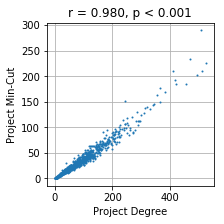

In [5]:
plt.figure(figsize=(1.5*15.0/7.0, 1.5*15.0/7.0))
plt.plot(df["degree_mean"], df["flow_mean"], '.', markersize=2)
plt.xlabel("Project Degree")
plt.ylabel("Project Min-Cut")
plt.title("r = 0.980, p < 0.001")
plt.grid()
plt.tight_layout()
plt.savefig("fig-degree-mincut.pdf", format="pdf")
plt.savefig("fig-degree-mincut.png", format="png", dpi=300)

/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

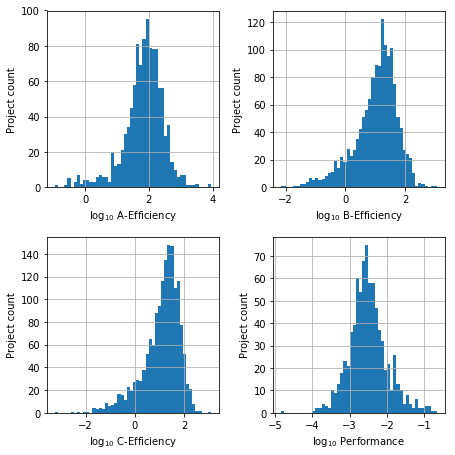

In [36]:
plt.figure(figsize=(3*15.0/7.0, 3*15.0/7.0))
subplot(2,2,1)
dfa = df[(df["stage_Delta_a"] > 0) & (df["stage_N_a"] > 0)]
dfa["a_stage_eff"] = dfa["stage_N_a"] / dfa["stage_Delta_a"]
#dfa["a_stage_eff"] = dfa["a_stage_eff"] / dfa["a_stage_eff"].mean()
plt.hist(np.log10(dfa["a_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ A-Efficiency")
plt.ylabel("Project count")

subplot(2,2,2)
dfb = df[(df["stage_Delta_b"] > 0) & (df["stage_N_b"] > 0)]
dfb["b_stage_eff"] = dfb["stage_N_b"] / dfb["stage_Delta_b"]
#dfb["b_stage_eff"] = dfb["b_stage_eff"] / dfb["b_stage_eff"].mean()
plt.hist(np.log10(dfb["b_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ B-Efficiency")
plt.ylabel("Project count")

subplot(2,2,3)
dfc = df[(df["stage_Delta_c"] > 0) & (df["stage_N_c"] > 0)]
dfc["c_stage_eff"] = dfc["stage_N_c"] / dfc["stage_Delta_c"]
#dfc["c_stage_eff"] = dfc["c_stage_eff"] / dfc["c_stage_eff"].mean()
plt.hist(np.log10(dfc["c_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ C-Efficiency")
plt.ylabel("Project count")

subplot(2,2,4)
dfp = df[(df["to_ga"] > 0) & (df["to_fa"] > 0) & df["article_count"] > 0]
dfp["perf"] = (dfp["to_ga"] + dfp["to_fa"]) / dfp["article_count"]
plt.hist(np.log10(dfp["perf"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ Performance")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-eff-perf-hist.pdf", format="pdf")

/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

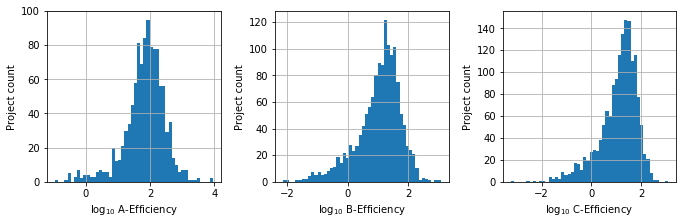

In [37]:
plt.figure(figsize=(4.5*15.0/7.0, 1.5*15.0/7.0))
subplot(1,3,1)
dfa = df[(df["stage_Delta_a"] > 0) & (df["stage_N_a"] > 0)]
dfa["a_stage_eff"] = dfa["stage_N_a"] / dfa["stage_Delta_a"]
#dfa["a_stage_eff"] = dfa["a_stage_eff"] / dfa["a_stage_eff"].mean()
plt.hist(np.log10(dfa["a_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ A-Efficiency")
plt.ylabel("Project count")

subplot(1,3,2)
dfb = df[(df["stage_Delta_b"] > 0) & (df["stage_N_b"] > 0)]
dfb["b_stage_eff"] = dfb["stage_N_b"] / dfb["stage_Delta_b"]
#dfb["b_stage_eff"] = dfb["b_stage_eff"] / dfb["b_stage_eff"].mean()
plt.hist(np.log10(dfb["b_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ B-Efficiency")
plt.ylabel("Project count")

subplot(1,3,3)
dfc = df[(df["stage_Delta_c"] > 0) & (df["stage_N_c"] > 0)]
dfc["c_stage_eff"] = dfc["stage_N_c"] / dfc["stage_Delta_c"]
#dfc["c_stage_eff"] = dfc["c_stage_eff"] / dfc["c_stage_eff"].mean()
plt.hist(np.log10(dfc["c_stage_eff"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ C-Efficiency")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-eff-hist.png", format="png", dpi=300)

/Users/elplatt/science/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


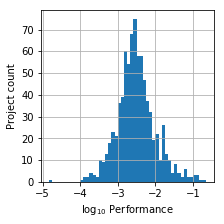

In [35]:
plt.figure(figsize=(1.5*15.0/7.0, 1.5*15.0/7.0))
dfp = df[(df["to_ga"] > 0) & (df["to_fa"] > 0) & df["article_count"] > 0]
dfp["perf"] = (dfp["to_ga"] + dfp["to_fa"]) / dfp["article_count"]
plt.hist(np.log10(dfp["perf"]), 50)
plt.grid()
plt.xlabel("log$_{10}$ Performance")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-perf-hist.png", format="png", dpi=300)

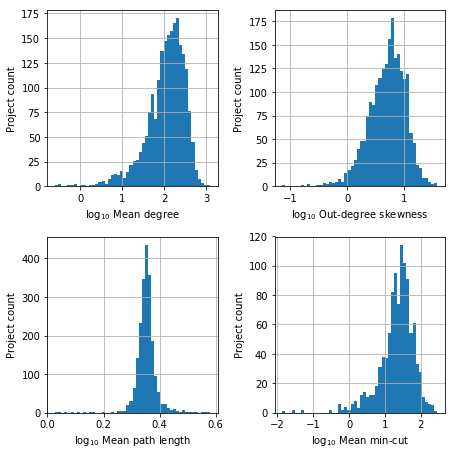

In [48]:
plt.figure(figsize=(45.0/7.0, 45.0/7.0))

plt.subplot(2,2,1)
dfdm = df[df["degree_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["degree_mean"]), 50)
plt.xlabel("log$_{10}$ Mean degree")
plt.ylabel("Project count")

plt.subplot(2,2,2)
dfdm = df[df["out_degree_skew"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["out_degree_skew"]), 50)
plt.xlabel("log$_{10}$ Out-degree skewness")
plt.ylabel("Project count")

plt.subplot(2,2,3)
dfdm = df[df["path_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["path_mean"]), 50)
plt.xlabel("log$_{10}$ Mean path length")
plt.ylabel("Project count")

plt.subplot(2,2,4)
dfdm = df[df["flow_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["flow_mean"]), 50)
plt.xlabel("log$_{10}$ Mean min-cut")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-net-hist.pdf", format="pdf")

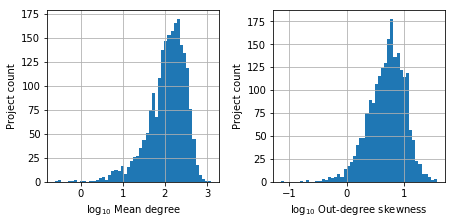

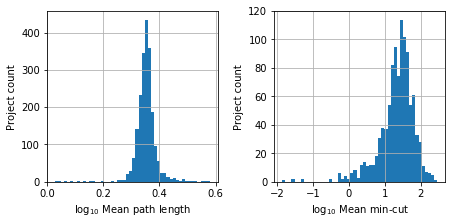

In [50]:
plt.figure(figsize=(45.0/7.0, 45.0/14.0))

plt.subplot(1,2,1)
dfdm = df[df["degree_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["degree_mean"]), 50)
plt.xlabel("log$_{10}$ Mean degree")
plt.ylabel("Project count")

plt.subplot(1,2,2)
dfdm = df[df["out_degree_skew"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["out_degree_skew"]), 50)
plt.xlabel("log$_{10}$ Out-degree skewness")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-degree-hist.png", format="png", dpi=300)

plt.figure(figsize=(45.0/7.0, 45.0/14.0))

plt.subplot(1,2,1)
dfdm = df[df["path_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["path_mean"]), 50)
plt.xlabel("log$_{10}$ Mean path length")
plt.ylabel("Project count")

plt.subplot(1,2,2)
dfdm = df[df["flow_mean"] > 0]
plt.grid()
plt.hist(np.log10(dfdm["flow_mean"]), 50)
plt.xlabel("log$_{10}$ Mean min-cut")
plt.ylabel("Project count")

plt.tight_layout()
plt.savefig("fig-net-hist.png", format="png", dpi=300)